<a href="https://colab.research.google.com/github/TrailingNomad/Music-Recommender/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset_path = "/content/gdrive/MyDrive/trash/delete/listenings.csv"

In [ ]:
dataset = pd.read_csv(dataset_path, error_bad_lines=False)
dataset.head()

Streaming output truncated to the last 5000 lines.
Skipping line 12788625: expected 7 fields, saw 8
Skipping line 12789812: expected 7 fields, saw 8
Skipping line 12791955: expected 7 fields, saw 8
Skipping line 12792092: expected 7 fields, saw 8
Skipping line 12795132: expected 7 fields, saw 8
Skipping line 12795545: expected 7 fields, saw 8
Skipping line 12796252: expected 7 fields, saw 10
Skipping line 12796295: expected 7 fields, saw 8
Skipping line 12796296: expected 7 fields, saw 8
Skipping line 12796922: expected 7 fields, saw 11
Skipping line 12796937: expected 7 fields, saw 8
Skipping line 12796953: expected 7 fields, saw 8
Skipping line 12797048: expected 7 fields, saw 11
Skipping line 12798986: expected 7 fields, saw 8
Skipping line 12798987: expected 7 fields, saw 8
Skipping line 12798990: expected 7 fields, saw 9
Skipping line 12798993: expected 7 fields, saw 11
Skipping line 12798994: expected 7 fields, saw 11
Skipping line 12799003: expected 7 fields, saw 11
Skipping lin

,user_id,date,track,artist,album
0,000Silenced,1299680100000,Price Tag,Jessie J,Who You Are
1,000Silenced,1299679920000,Price Tag (Acoustic Version),Jessie J,Price Tag
2,000Silenced,1299679440000,Be Mine! (Ballad Version),Robyn,Be Mine!
3,000Silenced,1299679200000,Acapella,Kelis,Acapella
4,000Silenced,1299675660000,I'm Not Invisible,The Tease,I'm Not Invisible


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166909 entries, 0 to 14166908
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   date     int64 
 2   track    object
 3   artist   object
 4   album    object
dtypes: int64(1), object(4)
memory usage: 540.4+ MB


In [ ]:
print("Unique users number: %d"%len(dataset.user_id.unique()))
print("Unique artists number: %d"%len(dataset.artist.unique()))
print("Unique track number: %d"%len(dataset.track.unique()))

Unique users number: 74207
Unique artists number: 310253
Unique track number: 1539076


In [ ]:
na_counts = dataset.isna().sum()
print(na_counts)

user_id         0
date            0
track         230
artist        275
album      889837
dtype: int64


In [ ]:
dataset['datetime'] = pd.to_datetime(dataset['date'], unit='ms')

# Extract date components
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month
dataset['day'] = dataset['datetime'].dt.day
dataset['hour'] = dataset['datetime'].dt.hour


In [ ]:
dataset.head()

,user_id,date,track,artist,album,datetime,year,month,day,hour
0,000Silenced,1299680100000,Price Tag,Jessie J,Who You Are,2011-03-09 14:15:00,2011,3,9,14
1,000Silenced,1299679920000,Price Tag (Acoustic Version),Jessie J,Price Tag,2011-03-09 14:12:00,2011,3,9,14
2,000Silenced,1299679440000,Be Mine! (Ballad Version),Robyn,Be Mine!,2011-03-09 14:04:00,2011,3,9,14
3,000Silenced,1299679200000,Acapella,Kelis,Acapella,2011-03-09 14:00:00,2011,3,9,14
4,000Silenced,1299675660000,I'm Not Invisible,The Tease,I'm Not Invisible,2011-03-09 13:01:00,2011,3,9,13


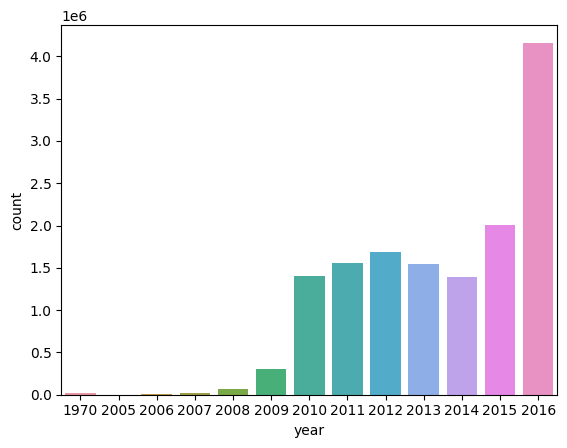

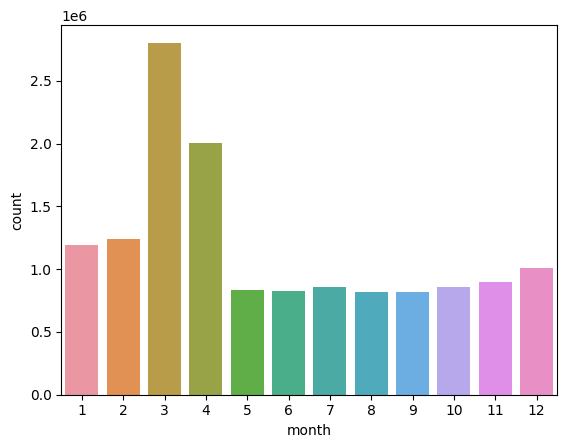

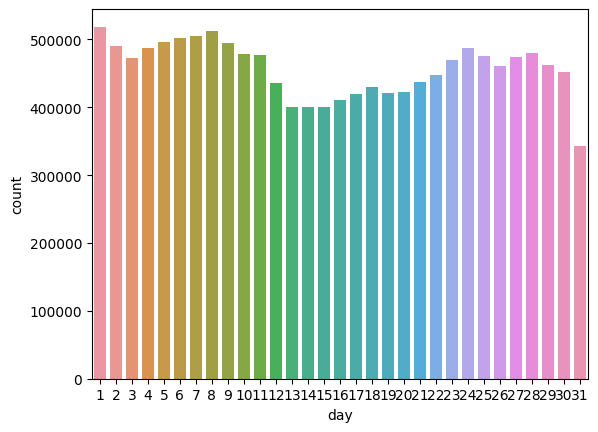

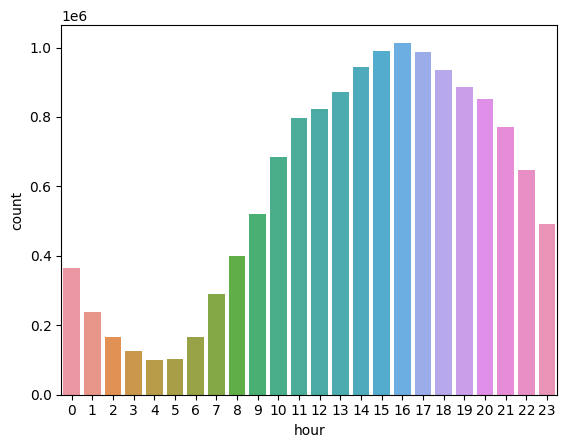

In [ ]:
plt.figure()
ax1 = sns.countplot(x='year',data=dataset)
plt.figure()
ax2 = sns.countplot(x='month',data=dataset)
plt.figure()
ax2 = sns.countplot(x='day',data=dataset)
plt.figure()
ax3 = sns.countplot(x='hour',data=dataset)

In [ ]:
dataset['track'].value_counts()[:10]

Intro      13255
Home        7821
Hello       6394
Hold On     5109
Work        5009
Sorry       4764
Runaway     4636
Closer      4510
Fire        4296
Stay        4203
Name: track, dtype: int64

In [ ]:
dataset['artist'].value_counts()[:10]

David Bowie       65076
Kanye West        56431
The Beatles       53470
Radiohead         48607
Arctic Monkeys    46798
Muse              44649
Rihanna           44226
Lady Gaga         43822
Coldplay          38081
Taylor Swift      37954
Name: artist, dtype: int64

In [ ]:
dataset['album'].value_counts()[:10]

Greatest Hits        67134
The Life Of Pablo    22279
AM                   14262
xx                   14134
An Awesome Wave      13650
Sigh No More         13534
Art Angels           11667
21                   11559
Lungs                11353
Born to Die           9985
Name: album, dtype: int64

In [ ]:
dataset_sample = dataset[(dataset.year==2015) & (dataset.month==3)]

In [ ]:
dataset_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134347 entries, 706 to 14160360
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   134347 non-null  object        
 1   date      134347 non-null  int64         
 2   track     134345 non-null  object        
 3   artist    134347 non-null  object        
 4   album     119635 non-null  object        
 5   datetime  134347 non-null  datetime64[ns]
 6   year      134347 non-null  int64         
 7   month     134347 non-null  int64         
 8   day       134347 non-null  int64         
 9   hour      134347 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 11.3+ MB


In [ ]:
dataset_sample.head()

,user_id,date,track,artist,album,datetime,year,month,day,hour
706,00fieldsy,1426974300000,Roxanne,The Police,The Very Best Of Sting And The Police,2015-03-21 21:45:00,2015,3,21,21
707,00fieldsy,1426974120000,Quiet Whiskey,Wynonie Harris,Rhythm & Blues & Booze,2015-03-21 21:42:00,2015,3,21,21
708,00fieldsy,1426973640000,Cigarettes & Alcohol,Oasis,Time Flies 1994-2009,2015-03-21 21:34:00,2015,3,21,21
709,00fieldsy,1426972740000,Sway - Remastered 2009,The Rolling Stones,Sticky Fingers (Remastered 2009),2015-03-21 21:19:00,2015,3,21,21
710,00fieldsy,1426972620000,Too Drunk to Fuck,Nouvelle Vague,Nouvelle Vague Special Edition,2015-03-21 21:17:00,2015,3,21,21


In [ ]:
print("Unique users number: %d"%len(dataset_sample.user_id.unique()))
print("Unique artists number: %d"%len(dataset_sample.artist.unique()))
print("Unique track number: %d"%len(dataset_sample.track.unique()))

Unique users number: 3107
Unique artists number: 16553
Unique track number: 59997


In [ ]:
na_counts = dataset_sample.isna().sum()
print(na_counts)

user_id         0
date            0
track           2
artist          0
album       14712
datetime        0
year            0
month           0
day             0
hour            0
dtype: int64


In [ ]:
# Assuming you already have your DataFrame, let's call it dataset_sample
# Dropping missing values

dataset_sample = dataset_sample.dropna()


In [ ]:
na_counts = dataset_sample.isna().sum()
print(na_counts)

user_id     0
date        0
track       0
artist      0
album       0
datetime    0
year        0
month       0
day         0
hour        0
dtype: int64


In [ ]:
from tqdm import tqdm

In [ ]:
def construct_user_matrix(_dataset:pd.DataFrame) -> pd.DataFrame:
    """
    Construct a n*m dataframe where n means the number of users
    and m means the number of unique tracks.
    Each value means how many times the user listened to the certain track
    """

    dataset = _dataset.copy()

    # sort the orginal dataframe by userid
    dataset_sorted = dataset.sort_values('user_id')
    dataset_sorted.reset_index(inplace=True)

    # one hot encodings for each track
    # set data type to int8 to reduce memory usage
    enc = OneHotEncoder(handle_unknown='ignore',dtype='int8')
    enc_dataset = enc.fit_transform(dataset_sorted[['artist']]).toarray()


    # get the list of occurrences of users
    user_list = list(dataset_sorted.user_id.unique())
    user_occurrence_list = dataset_sorted.user_id.value_counts()

    # user range dictionary with tuple of the start index and end index
    pos=0
    start = 0
    user_range_dic = {}
    index_to_user={}
    for user in user_list:
        end = start+user_occurrence_list.loc[user]
        user_range_dic[user] = (start, end,pos)
        index_to_user[pos]=user
        start = end
        pos+=1
        # initialize the array with all zeros
    # set data type to int instead of the default float to reduce memory usage
    user_track_arr = np.zeros((len(user_list), enc_dataset.shape[1]), dtype=int)

    # construct the final dataframe by summing up
    row = 0
    for user, (start, end,pos) in tqdm(user_range_dic.items()):

        # sum the occurrences of each track given the range of rows for the user
        user_track_row = np.sum(enc_dataset[start:end], axis=0)

        # add it to numpy array
        user_track_arr[row,:] = user_track_row

        row += 1

    # column names excluding the 'artist_track_' prefix
    column_names = [i[13:] for i in enc.get_feature_names_out()]

    # convert the numpy array to dataframe
    user_track_dataset = pd.DataFrame(user_track_arr, index=user_list, columns=column_names)

    return user_track_dataset,user_range_dic,index_to_user

In [ ]:
user_track_dataset,user_range_dic,index_to_user= construct_user_matrix(dataset_sample)

100%|██████████| 2745/2745 [00:01<00:00, 1505.39it/s]


In [ ]:
#Visualizing the index_to_user dictionary
index_to_user

{0: '-Krystal-',
 1: '-citric-',
 2: '-haha-',
 3: '00fieldsy',
 4: '01higginsr',
 5: '1losthousemate',
 6: '2manysparkles',
 7: '66z',
 8: '9thAtPine',
 9: 'ABoynamedStu',
 10: 'AGIRLCALLEDLISA',
 11: 'AJBuggy',
 12: 'ALXtop',
 13: 'AMB3RR',
 14: 'AMomentLikeThis',
 15: 'ARRANRP',
 16: 'AStormInHeaven',
 17: 'AWasteOfPaint',
 18: 'Aabey14',
 19: 'Aarghlex',
 20: 'AaronSpiers',
 21: 'Abbstar',
 22: 'Acdc2693',
 23: 'Acidicx',
 24: 'Acquiescence',
 25: 'AdamEW',
 26: 'AdamJohnLowe',
 27: 'Adam_Mitchell20',
 28: 'Adam__Thomas',
 29: 'Adds102',
 30: 'AdeBrown',
 31: 'Admiral-jimbob',
 32: 'Adzanrana',
 33: 'Aestheticist',
 34: 'Agento_Orange',
 35: 'Ajescent',
 36: 'AlBassStar',
 37: 'Alan_G',
 38: 'AlexEtchells',
 39: 'AlexJamesJose',
 40: 'AlexM17',
 41: 'AlexMaskill',
 42: 'AlexOCnr',
 43: 'AlexisSkitini',
 44: 'AlexxRawr',
 45: 'AliBlack',
 46: 'AlisonLovelock',
 47: 'AlisonSakai',
 48: 'All-The-Rage',
 49: 'Altercarnated',
 50: 'AmandaLeighKidd',
 51: 'Amberful',
 52: 'Amiii264',
 53

In [ ]:
# Visualizing the user_range_dic
user_range_dic

{'-Krystal-': (0, 128, 0),
 '-citric-': (128, 136, 1),
 '-haha-': (136, 161, 2),
 '00fieldsy': (161, 205, 3),
 '01higginsr': (205, 207, 4),
 '1losthousemate': (207, 338, 5),
 '2manysparkles': (338, 350, 6),
 '66z': (350, 355, 7),
 '9thAtPine': (355, 395, 8),
 'ABoynamedStu': (395, 398, 9),
 'AGIRLCALLEDLISA': (398, 441, 10),
 'AJBuggy': (441, 516, 11),
 'ALXtop': (516, 635, 12),
 'AMB3RR': (635, 795, 13),
 'AMomentLikeThis': (795, 916, 14),
 'ARRANRP': (916, 1109, 15),
 'AStormInHeaven': (1109, 1138, 16),
 'AWasteOfPaint': (1138, 1178, 17),
 'Aabey14': (1178, 1214, 18),
 'Aarghlex': (1214, 1222, 19),
 'AaronSpiers': (1222, 1343, 20),
 'Abbstar': (1343, 1364, 21),
 'Acdc2693': (1364, 1504, 22),
 'Acidicx': (1504, 1664, 23),
 'Acquiescence': (1664, 1709, 24),
 'AdamEW': (1709, 1712, 25),
 'AdamJohnLowe': (1712, 1811, 26),
 'Adam_Mitchell20': (1811, 1840, 27),
 'Adam__Thomas': (1840, 1841, 28),
 'Adds102': (1841, 1930, 29),
 'AdeBrown': (1930, 1932, 30),
 'Admiral-jimbob': (1932, 1933, 31

In [ ]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
# Assuming you already have user_track_dataset
pca = PCA(n_components=3)  # Reduce the dimensions to 2 for visualization
user_track_pca = pca.fit_transform(user_track_dataset)


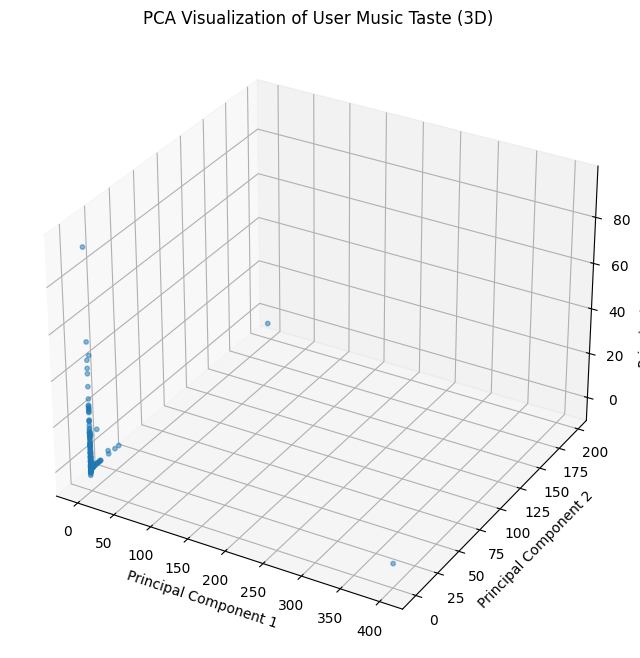

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(user_track_pca[:, 0], user_track_pca[:, 1], user_track_pca[:, 2], s=10, alpha=0.5)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA Visualization of User Music Taste (3D)")

plt.show()


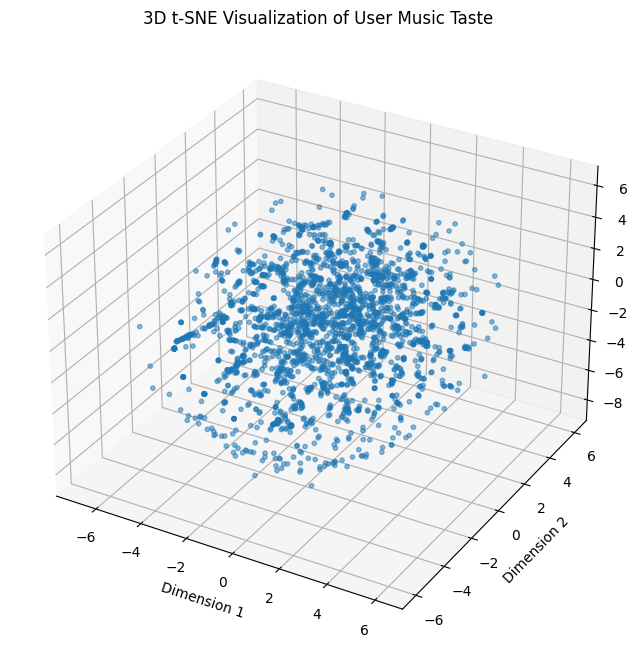

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Assuming you already have user_track_dataset
user_track_tsne_3d = TSNE(n_components=3, perplexity=30, n_iter=300).fit_transform(user_track_dataset)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(user_track_tsne_3d[:, 0], user_track_tsne_3d[:, 1], user_track_tsne_3d[:, 2], s=10, alpha=0.5)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.set_title("3D t-SNE Visualization of User Music Taste")

plt.show()


Progress: 100%|██████████| 499/499 [04:02<00:00,  2.05it/s]


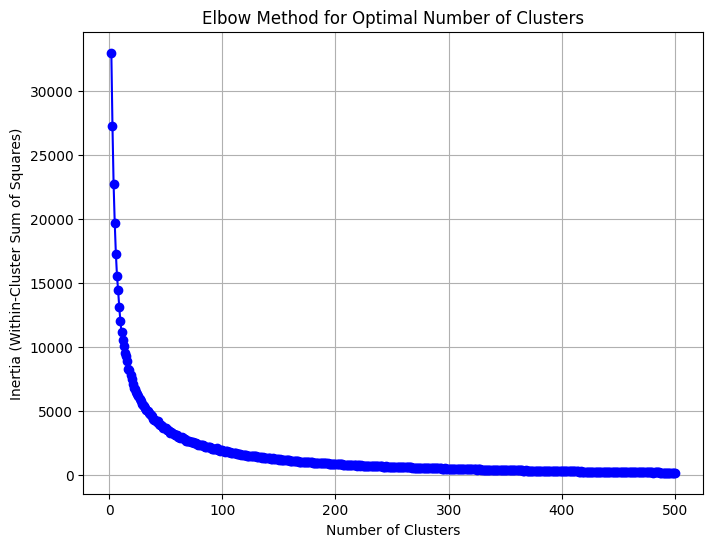

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

cluster_range = range(2, 501)  # You can adjust the range as needed

# Initialize a list to store the Inertia values for different cluster numbers
# Initialize lists to store the Silhouette scores and Davies Bouldin scores for different cluster numbers
inertia_values = []
silhouette_scores = []
davies_bouldin_scores= []

# Iterate through the cluster numbers and calculate Inertia for each
for i in tqdm(cluster_range,desc='Progress'):
    kmeans = KMeans(n_clusters=i,n_init="auto")
    kmeans.fit(user_track_tsne_3d)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    silhouette_scores.append(silhouette_score(user_track_tsne_3d, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(user_track_tsne_3d, kmeans.labels_))

# Plot the Inertia values
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


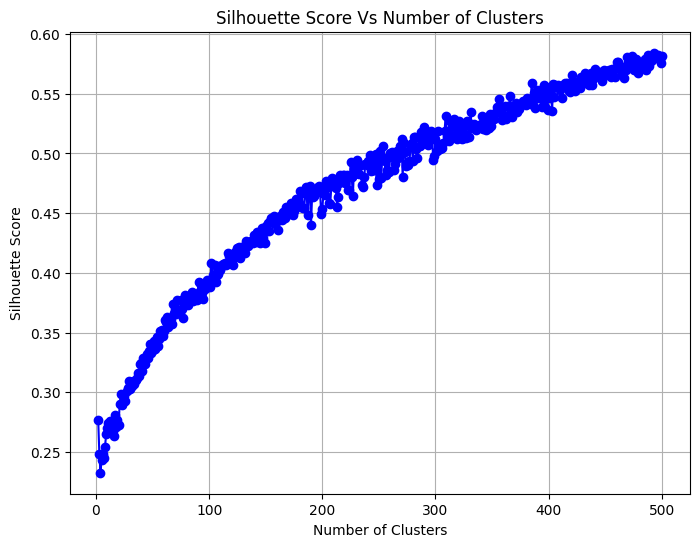

In [ ]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score Vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

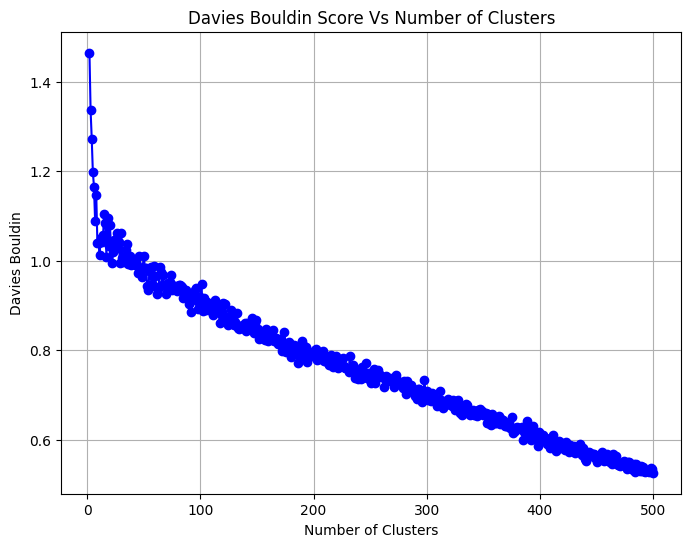

In [ ]:
# Plot the Davies Bouldin Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o', linestyle='-', color='b')
plt.title('Davies Bouldin Score Vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin')
plt.grid(True)
plt.show()

In [ ]:
# Using the elbow curve, the optimal number of clusters = 80

n_clusters = 80

# Initialize and fit the K-Means model
kmeans_3d = KMeans(n_clusters=n_clusters,n_init="auto")
clusters_3d = kmeans_3d.fit_predict(user_track_tsne_3d)  # user_track_tsne_3d is your 3D t-SNE representation


In [ ]:
# Exploring the clusters
print(kmeans_3d.cluster_centers_)
print(clusters_3d)


[[-0.88472694 -0.94330275 -1.3564608 ]
 [ 1.1536493   1.6119522   1.7666242 ]
 [-1.8827052  -3.0209506   2.2425308 ]
 [ 2.226606   -0.7942736  -1.3217131 ]
 [-0.06398519  1.497697    0.505587  ]
 [-0.13599032 -4.3623996  -0.30440292]
 [ 0.24821685 -2.167165   -6.9662657 ]
 [-1.1774682   3.407763   -2.1850507 ]
 [-5.9091744  -1.767516   -3.1683836 ]
 [-1.4003708   0.28624347  4.0210495 ]
 [-4.01664    -3.220777   -0.1158658 ]
 [ 0.5399986   3.3607438  -1.9014087 ]
 [ 0.362706   -1.6735592   1.0529468 ]
 [ 0.84315044  0.35470685 -5.558177  ]
 [-3.8615203   0.14648914 -0.14086884]
 [ 3.516542    2.3688865   1.2861036 ]
 [ 4.3465347  -1.8630762  -0.39908308]
 [ 2.1769018   1.8687502  -2.2599204 ]
 [ 3.0694332  -0.27814978  3.7406545 ]
 [ 1.6539243   0.04036689  0.442933  ]
 [-2.4898124   1.8670379   3.3492825 ]
 [-2.136918   -5.0202203  -3.5200446 ]
 [-2.9962752  -2.9901814  -2.9643714 ]
 [-1.563142   -0.9425014  -6.836347  ]
 [-0.7065028   4.6229925  -0.54715276]
 [ 0.18885832  0.18277583

In [ ]:

data = user_track_tsne_3d
clusters = clusters_3d
# 1. Inertia (Within-Cluster Sum of Squares)
kmeans = KMeans(n_clusters=80,n_init="auto")  # Replace with the number of clusters used
kmeans.fit(data)
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

# 2. Silhouette Score
silhouette_avg = silhouette_score(data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# 3. Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data, clusters)
print(f'Davies-Bouldin Index: {davies_bouldin}')


Inertia: 2386.50439453125
Silhouette Score: 0.3772442638874054
Davies-Bouldin Index: 0.954402247065385


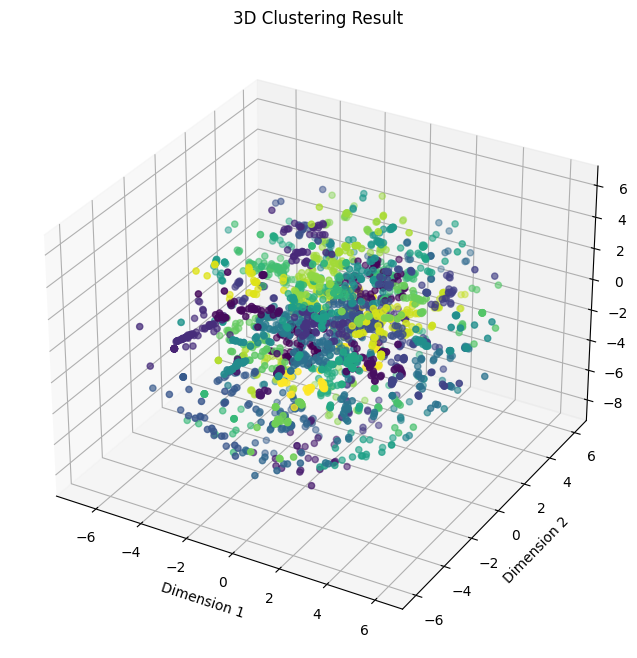

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming you have 3D t-SNE representation
ax.scatter(user_track_tsne_3d[:, 0], user_track_tsne_3d[:, 1], user_track_tsne_3d[:, 2], c=clusters_3d, cmap='viridis')

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.set_title("3D Clustering Result")

plt.show()


In [ ]:
# Print the top five friends with the most similar music taste
# Recommend the favourite artists of the people with the most similar music taste till the user has three unique recommendations
def recommender(pos,user_track_tsne_3d,index_to_user):
  from sklearn.neighbors import NearestNeighbors
  neighbour = NearestNeighbors(n_neighbors=40, metric="manhattan")
  neighbour.fit(user_track_tsne_3d)
  a,b=neighbour.kneighbors(user_track_tsne_3d[pos].reshape(1,-1))
  b=np.delete(b[0],0) # Excluding the user from his set of nearest neighbours
  friends=[]
  print("Top 5 Friends based on Similar Music Tastes")
  for p in b:
    friends.append(index_to_user[p])
    if(len(friends)==5):
      break
  print(friends)

  community=[]
  people=[]
  community_index=clusters_3d[pos]
  print("People in your Music Community ")
  for i in range(len(clusters_3d)):
    if(community_index==clusters_3d[i]):
      community.append(i)
  for i in community:
    people.append(index_to_user[i])
  print(people)
  recommend=set()
  print("Top 3 Recommendations ")
  for row in b:
    max=0
    for column in user_track_dataset:
      l=user_track_dataset.iloc[row][column]
      listen_count=np.sum(l)
      if(listen_count>=max):
        max=listen_count
        favourite=column
    recommend.add(favourite)
    recommend.discard('')
    if(len(recommend)==3):
      break
  print(recommend)



In [ ]:
while(True):
  # funcoder
  id=input("Enter your user id  ")
  try:
    start,end,pos=user_range_dic[id]
    recommender(pos,user_track_tsne_3d,index_to_user)
  except:
    print("Please enter a valid ID ")
  choice=input("Do you wish to continue (y/n) ")
  if(choice=='n'):
    break


Top 5 Friends based on Similar Music Tastes
['chemollimo', 'IndieSkies', 'C_Moz', 'dxhawk', 'chunkyMunky123']
People in your Music Community 
['Chess__', 'Duracell_Plus', 'Georgegrafton', 'HarlequinGresh', 'ataraxicninja', 'blackdublinski', 'domo_hudson', 'funcoder', 'harleygrant', 'heptinstall304', 'jels']
Top 3 Recommendations 
{'o Dolls', ' Budd', 't Pussy'}
Do you wish to continue (y/n) n


In [ ]:
! pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def fn(id):
    try:
        start, end, pos = user_range_dic[id]
        result = recommender(pos, user_track_tsne_3d, index_to_user)

        top_friends = ', '.join(result["top_friends"])
        top_comm = ', '.join(result["community"])
        top_recomm = ', '.join(result["recommend"])

        return top_friends, top_comm, top_recomm
    except KeyError:
        return "Invalid ID. Please enter a valid user ID.", ""

with gr.Blocks() as demo:
    gr.Markdown("Symphony Mates")
    with gr.Tab("Music recommendation system"):
        with gr.Row():
            text_input = gr.Textbox(label="User ID")
            text_output1 = gr.Textbox(label = "Top 5 Friends")
            text_output2 = gr.Textbox(label = "Music Community")
            text_output3 = gr.Textbox(label = "Top 3 Recommendations")

        button = gr.Button("Submit")




    button.click(fn, inputs = text_input, outputs = [text_output1, text_output2, text_output3])

demo.launch()
